## Import Statements

In [1]:
import pandas as pd
import math
from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
import plotly.plotly as py
import plotly.graph_objs as go
from pandas.tools.plotting import scatter_matrix

## Reading the data file

In [2]:
mpg_data = pd.read_csv("Ex04_Mpg_Regression.csv")

In [3]:
mpg_data = shuffle(mpg_data)

In [4]:
mpg_data.is_copy=False

## Creating the Dataset

In [5]:
mpg_data['horsepower'] = mpg_data['horsepower'].str.replace("?", "0.0")
mpg_data['horsepower'] = mpg_data['horsepower'].astype(float)

In [6]:
mpg_data_car = list(mpg_data['carname'])
carname = []
for ind in range(len(mpg_data_car)):
    carname.append(mpg_data_car[ind].split()[0])
uniq_car = set(carname)
car_to_ix = { car:i for i,car in enumerate(uniq_car)}
mpg_data['carname'] = [car_to_ix[car.split()[0]] for car in mpg_data_car]

In [7]:
mpg_data_y = mpg_data['mpg']
mpg_data_x = mpg_data.drop(['mpg'], axis=1)

## Basic Analysis

In [10]:
mpg_data.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,carname
mpg,1.000000,-0.775412,-0.803972,-0.753982,-0.831558,0.419133,0.578667,0.562894,0.076826
cylinders,-0.775412,1.000000,0.950718,0.821909,0.896623,-0.503016,-0.344729,-0.561796,-0.022283
displacement,-0.803972,0.950718,1.000000,0.871881,0.932957,-0.542083,-0.367470,-0.608749,-0.002146
horsepower,-0.753982,0.821909,0.871881,1.000000,0.837815,-0.673551,-0.410430,-0.417930,0.043654
weight,-0.831558,0.896623,0.932957,0.837815,1.000000,-0.416488,-0.305150,-0.580552,-0.060582
acceleration,0.419133,-0.503016,-0.542083,-0.673551,-0.416488,1.000000,0.284376,0.204102,-0.051377
modelyear,0.578667,-0.344729,-0.367470,-0.410430,-0.305150,0.284376,1.000000,0.178441,0.055580
origin,0.562894,-0.561796,-0.608749,-0.417930,-0.580552,0.204102,0.178441,1.000000,0.157743
carname,0.076826,-0.022283,-0.002146,0.043654,-0.060582,-0.051377,0.055580,0.157743,1.000000


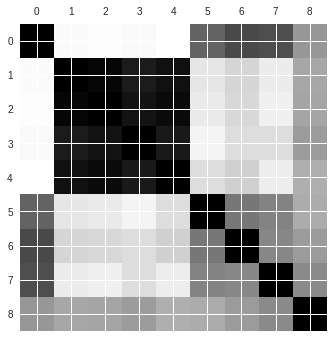

In [11]:
plt.matshow(mpg_data.corr())
plt.show()

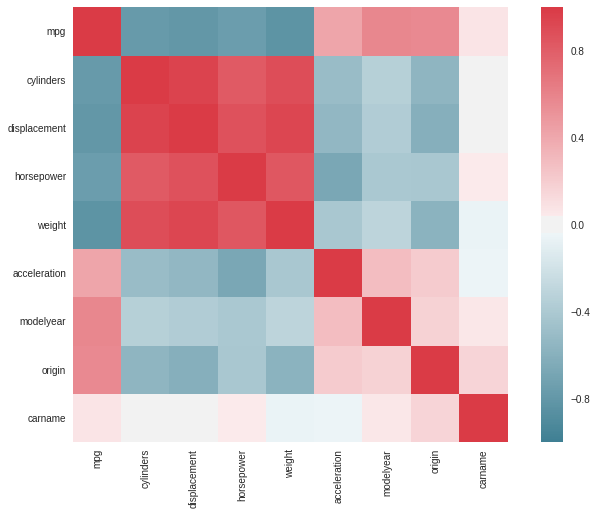

In [12]:
f, ax = plt.subplots(figsize=(12, 8))
corr = mpg_data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()

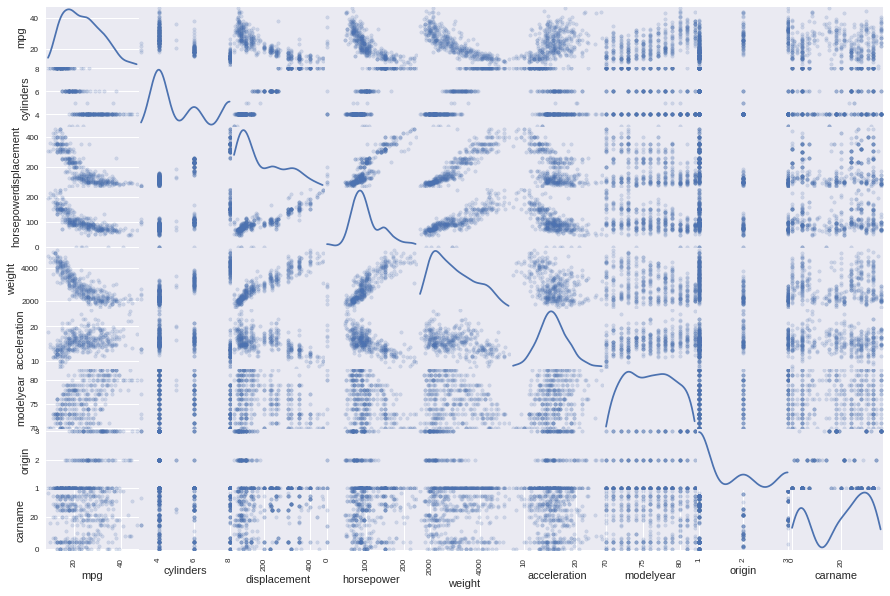

In [13]:
scatter_matrix(mpg_data, alpha=0.2, figsize=(15,10), diagonal='kde')
plt.show()

## Scatter plots regressors vs regressand

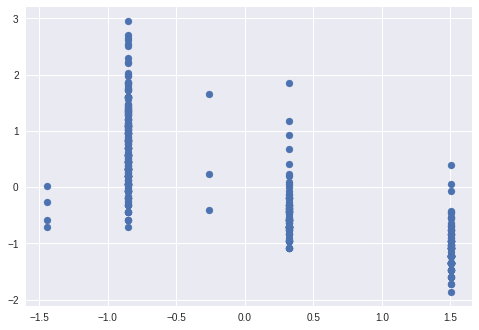

In [1053]:
plt.scatter(data_stan.cylinders, data_stan.mpg)
plt.show()

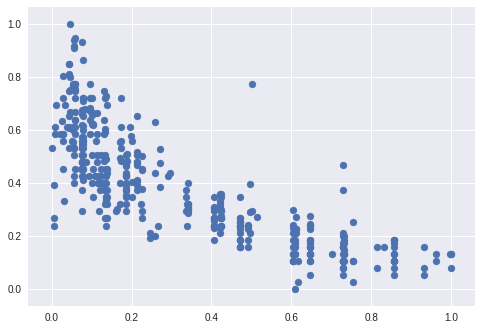

In [781]:
plt.scatter(data_stan.displacement, data_stan.mpg)
plt.show()

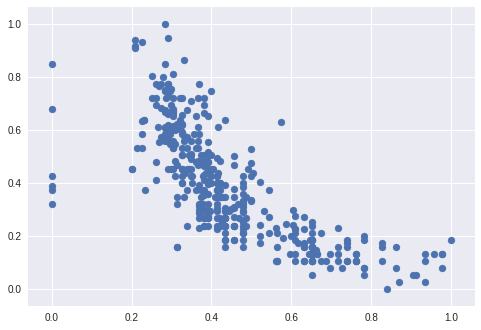

In [782]:
plt.scatter(data_stan.horsepower, data_stan.mpg)
plt.show()

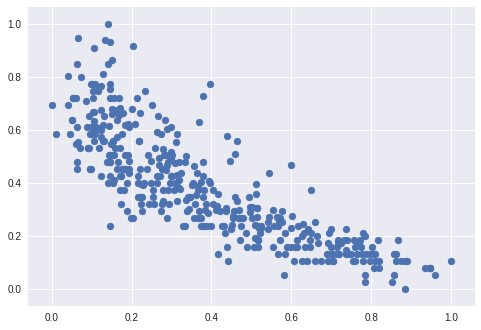

In [783]:
plt.scatter(data_stan.weight, data_stan.mpg)
plt.show()

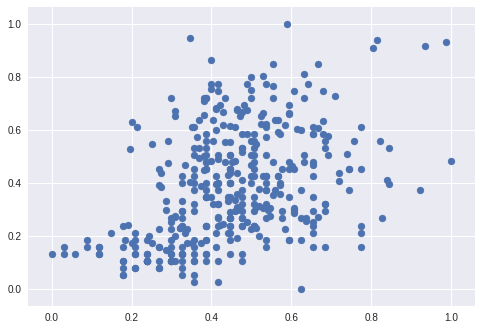

In [784]:
plt.scatter(data_stan.acceleration, data_stan.mpg)
plt.show()

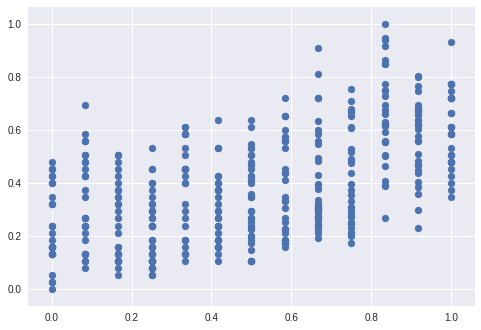

In [785]:
plt.scatter(data_stan.modelyear, data_stan.mpg)
plt.show()

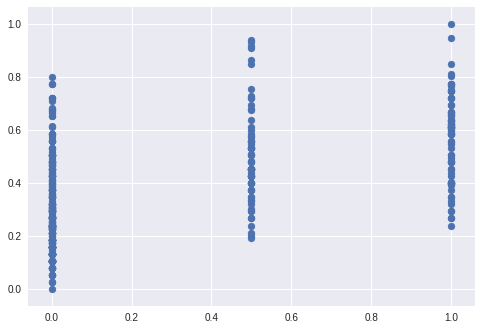

In [786]:
plt.scatter(data_stan.origin, data_stan.mpg)
plt.show()

## Making Train and Test Datasets

Standardised train and test datasets

In [8]:
mpg_data_x_train = mpg_data_x[:int(0.8*len(mpg_data_x))]
mpg_data_y_train = mpg_data_y[:int(0.8*len(mpg_data_y))]
mpg_data_x_test = mpg_data_x[int(0.8*len(mpg_data_x)):]
mpg_data_y_test = mpg_data_y[int(0.8*len(mpg_data_y)):]

## Standardising the data

In [38]:
mpg_data_stan = (mpg_data-mpg_data.mean())/mpg_data.std()

In [9]:
mpg_data_x_train = (mpg_data_x_train-mpg_data_x_train.mean())/mpg_data_x_train.std()
mpg_data_x_test = (mpg_data_x_test-mpg_data_x_test.mean())/mpg_data_x_test.std()
mpg_data_y_train = (mpg_data_y_train-mpg_data_y_train.mean())/mpg_data_y_train.std()

## Linear Regression Model

In [23]:
reg = linear_model.LinearRegression()
reg.normalize=True
reg.fit (mpg_data_x_train, mpg_data_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [24]:
tr_coeffs = reg.coef_
tr_resi = reg.residues_
tr_intr = reg.intercept_
print("Coeffs: ", tr_coeffs)
print("Residuals: ", tr_resi)
print("Intercept: ", tr_intr)

Coeffs:  [-0.12282777  0.3342946  -0.06780744 -0.73875685  0.05407104  0.36289533
  0.17404307  0.00160053]
Residuals:  53.2133350435
Intercept:  1.0835823146e-16


/home/user/StackRoute/Assignments/lib/python3.5/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning:

Function residues_ is deprecated; ``residues_`` is deprecated and will be removed in 0.19



In [25]:
pred_lin = reg.predict(mpg_data_x_test)

In [26]:
pred_lin = (pred_lin*mpg_data_y_test.std())+mpg_data_y_test.mean()

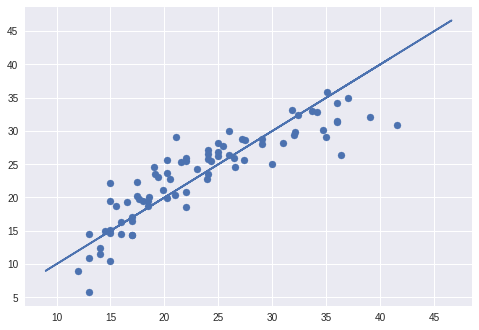

In [99]:
plt.scatter(mpg_data_y_test, pred_lin)
plt.plot(mpg_data.mpg, mpg_data.mpg)
plt.show()

In [30]:
errors = pred_lin-mpg_data_y_test

In [31]:
errors.mean()

-6.7279515292284488e-15

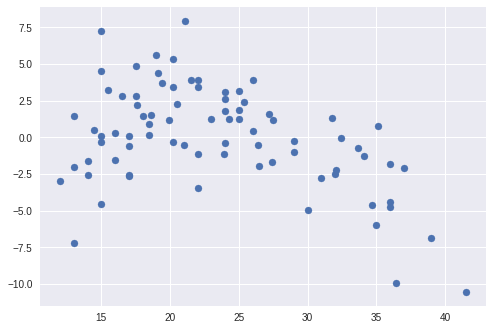

In [33]:
plt.scatter(mpg_data_y_test, errors)
plt.show()

## Linear Regression Model : OLS

In [39]:
result = sm.ols(formula="mpg ~ cylinders + displacement + horsepower + weight + modelyear + origin + carname", data=mpg_data_stan).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     254.1
Date:                Fri, 31 Mar 2017   Prob (F-statistic):          7.67e-141
Time:                        16:52:02   Log-Likelihood:                -221.81
No. Observations:                 397   AIC:                             459.6
Df Residuals:                     389   BIC:                             491.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     2.021e-16      0.021   9.42e-15      1.000      -0.042       0.042
cylinders       -0.0962      0.070     -1.372      0.171      -0.234       0.042
displacement     0.2361      0.099      2.395      0.017       0.042       0.430
horsepower      -0.0872      0.048     -1.825      0.069      -0.181       0.007
weight          -0.6977      0.062    -11.184      0.000      -0.820      -0.575
modelyear        0.3574      0.024     14.927      0.000       0.310       0.405
origin           0.1483      0.029      5.121      0.000       0.091       0.205
carname         -0.0065      0.022     -0.291      0.771      -0.051       0.038
==============================================================================
Omnibus:                       34.695   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.979
Skew:                           0.544   Prob(JB):                     5.73e-14
Kurtosis:                       4.581   Cond. No.                         11.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
pred_ols = result.predict(mpg_data_x_test)

In [41]:
pred_ols = (pred_ols*mpg_data_y_test.std())+mpg_data_y_test.mean()

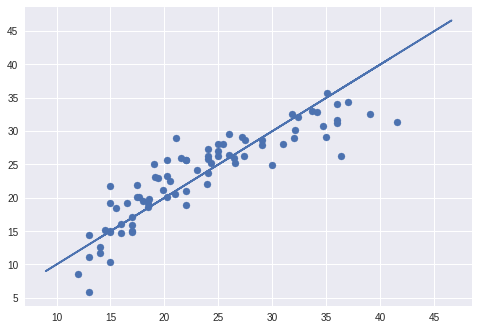

In [42]:
plt.scatter(mpg_data_y_test, pred_ols)
plt.plot(mpg_data.mpg, mpg_data.mpg)
plt.show()

In [44]:
errors_abs = np.abs(pred_ols-mpg_data_y_test)
errors = pred_ols-mpg_data_y_test

In [45]:
errors.mean()

-4.8405723873656827e-15

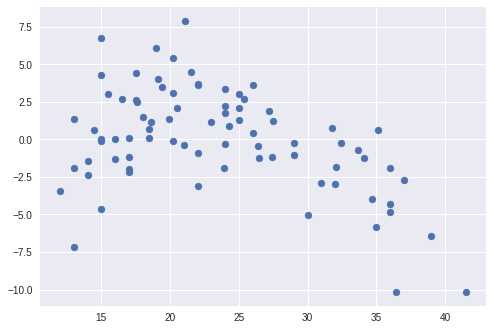

In [46]:
plt.scatter(mpg_data_y_test, errors)
plt.show()

## Linear Regression Model : Lasso

In [56]:
alphas = np.linspace(0.001,0.1,10000)*0.5

In [57]:
lasso = linear_model.Lasso(max_iter = 10000, normalize=True)
coeffs = []
for al in alphas:
    lasso.set_params(alpha=al)
    lasso.fit(np.array(mpg_data_x_train), np.array(mpg_data_y_train))
    coeffs.append(lasso.coef_)
ax = plt.gca()
ax.plot(2*alphas, coeffs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

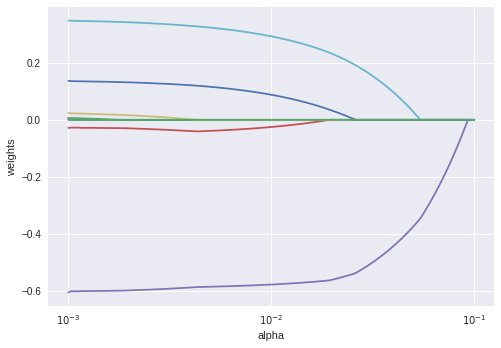

In [58]:
plt.show()

In [89]:
lassocv = linear_model.LassoCV(alphas=None, cv=10, max_iter=100000, normalize=True)
lassocv.fit(np.array(mpg_data_x_train), np.array(mpg_data_y_train))
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(np.array(mpg_data_x_train), np.array(mpg_data_y_train))
pred = lasso.predict(mpg_data_x_test)
mean_squared_error(mpg_data_y_test, (pred*mpg_data_y_test.std())+mpg_data_y_test.mean())

11.939112619412665

In [90]:
print("Coeffs: ", lasso.coef_)
print("Intercept: ", lasso.intercept_)
print("Aplha: ", lasso.alpha)

Coeffs:  [-0.10312     0.29316609 -0.06321336 -0.72524094  0.0509538   0.36138198
  0.16976366  0.00218432]
Intercept:  1.15023011922e-16
Aplha:  5.35215256317e-05


In [91]:
pred_lasso = lasso.predict(mpg_data_x_test)
pred_lasso = (pred_lasso*mpg_data_y_test.std())+mpg_data_y_test.mean()

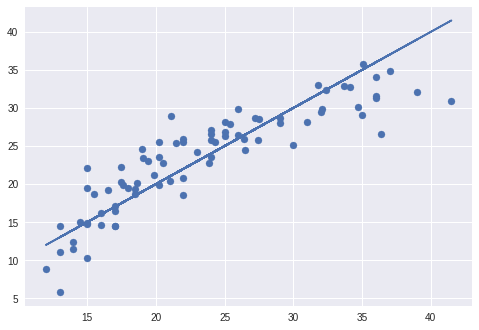

In [92]:
plt.scatter(mpg_data_y_test, pred_lasso)
plt.plot(mpg_data_y_test,mpg_data_y_test)
plt.show()

In [93]:
errors_abs = np.abs(pred_lasso-np.array(mpg_data_y_test))
errors = pred_lasso.reshape(80,1)-np.array(mpg_data_y_test).reshape(80,1)

In [94]:
errors.mean()

-5.773159728050814e-15

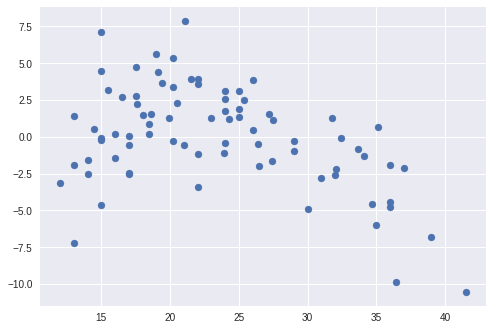

In [95]:
plt.scatter(np.array(mpg_data_y_test).reshape(80,1), errors)
plt.show()

## Histogram of Errors - Lasso

In [96]:
y = pd.DataFrame(errors)

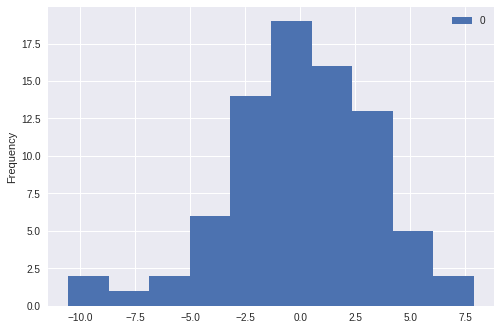

In [97]:
y.plot(kind = 'hist')
plt.show()

## Box Plot - Lasso

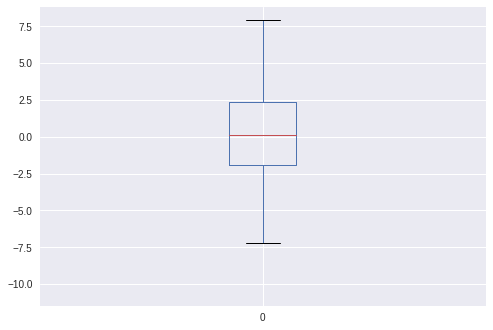

In [98]:
y.plot(kind = 'box')
plt.show()